In [ ]:
!pip install ultralytics
!pip install roboflow

In [ ]:
!nvidia-smi

In [30]:
from google.colab import drive
import os
from ultralytics import YOLO
import random
from IPython.display import Image
from roboflow import Roboflow

Configure uma pasta do drive para salvar os arquivos.

In [20]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Programa k')
HOME = os.getcwd()

Baixa o dataset escolhido pelo grupo!

In [9]:
rf = Roboflow(api_key="") #Use uma chave API do roboflow para baixar o dataset
project = rf.workspace("shahad-alotaibi-ujdrb").project("car-accident-severity")
version = project.version(1)
dataset = version.download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-Accident-Severity-1 in yolov8-obb:: 100%|██████████| 13316/13316 [02:00<00:00, 110.14it/s]


## Treinamento

In [17]:
model = YOLO(model='yolov8n.pt')

#Train the model with GPUs
result = model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=10,
    imgsz=640,
    batch=8,
    name='yolov8n_detections')

Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Programa k/Car-Accident-Severity-1/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_detections4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

100%|██████████| 755k/755k [00:00<00:00, 19.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Programa k/Car-Accident-Severity-1/train/labels... 5321 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5321/5321 [02:02<00:00, 43.36it/s] 


train: New cache created: /content/drive/MyDrive/Programa k/Car-Accident-Severity-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/drive/MyDrive/Programa k/Car-Accident-Severity-1/valid/labels... 998 images, 0 backgrounds, 0 corrupt: 100%|██████████| 998/998 [00:16<00:00, 61.51it/s]


val: New cache created: /content/drive/MyDrive/Programa k/Car-Accident-Severity-1/valid/labels.cache
Plotting labels to runs/detect/yolov8n_detections4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_detections4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.41G      1.082      2.409      1.477          1        640: 100%|██████████| 666/666 [03:33<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:20<00:00,  3.05it/s]


                   all        998       1038      0.477      0.491      0.463      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.22G      1.151      1.621       1.52          1        640: 100%|██████████| 666/666 [03:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:18<00:00,  3.37it/s]


                   all        998       1038      0.562      0.562      0.575      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.23G      1.131      1.394      1.491          0        640: 100%|██████████| 666/666 [03:08<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:19<00:00,  3.18it/s]


                   all        998       1038      0.532      0.576      0.594      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.23G      1.026      1.194       1.41          1        640: 100%|██████████| 666/666 [03:12<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:19<00:00,  3.23it/s]

                   all        998       1038      0.711      0.686      0.734      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.23G     0.9227      1.026      1.318          1        640: 100%|██████████| 666/666 [03:07<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.40it/s]

                   all        998       1038       0.79      0.695      0.796      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.23G     0.8458     0.9085      1.259          1        640: 100%|██████████| 666/666 [03:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.83it/s]

                   all        998       1038      0.802      0.726      0.828      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.23G     0.7707     0.7839      1.192          1        640: 100%|██████████| 666/666 [03:15<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:20<00:00,  3.10it/s]

                   all        998       1038       0.87      0.794      0.882      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.23G     0.7049     0.6667      1.139          1        640: 100%|██████████| 666/666 [03:17<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:18<00:00,  3.40it/s]

                   all        998       1038      0.897       0.83      0.916      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.23G     0.6396     0.5938      1.086          1        640: 100%|██████████| 666/666 [03:16<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:19<00:00,  3.16it/s]


                   all        998       1038      0.939       0.82      0.931      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.23G     0.5832     0.5054      1.041          1        640: 100%|██████████| 666/666 [03:12<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:20<00:00,  3.15it/s]


                   all        998       1038      0.924      0.885      0.949      0.821

10 epochs completed in 0.603 hours.
Optimizer stripped from runs/detect/yolov8n_detections4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_detections4/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_detections4/weights/best.pt...
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:24<00:00,  2.60it/s]


                   all        998       1038      0.925      0.887      0.949      0.821
     accident moderate        257        261      0.891      0.843      0.923      0.792
       accident severe        746        777       0.96      0.931      0.975       0.85
Speed: 0.5ms preprocess, 3.9ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/yolov8n_detections4


## Avaliaçaõ do modelo

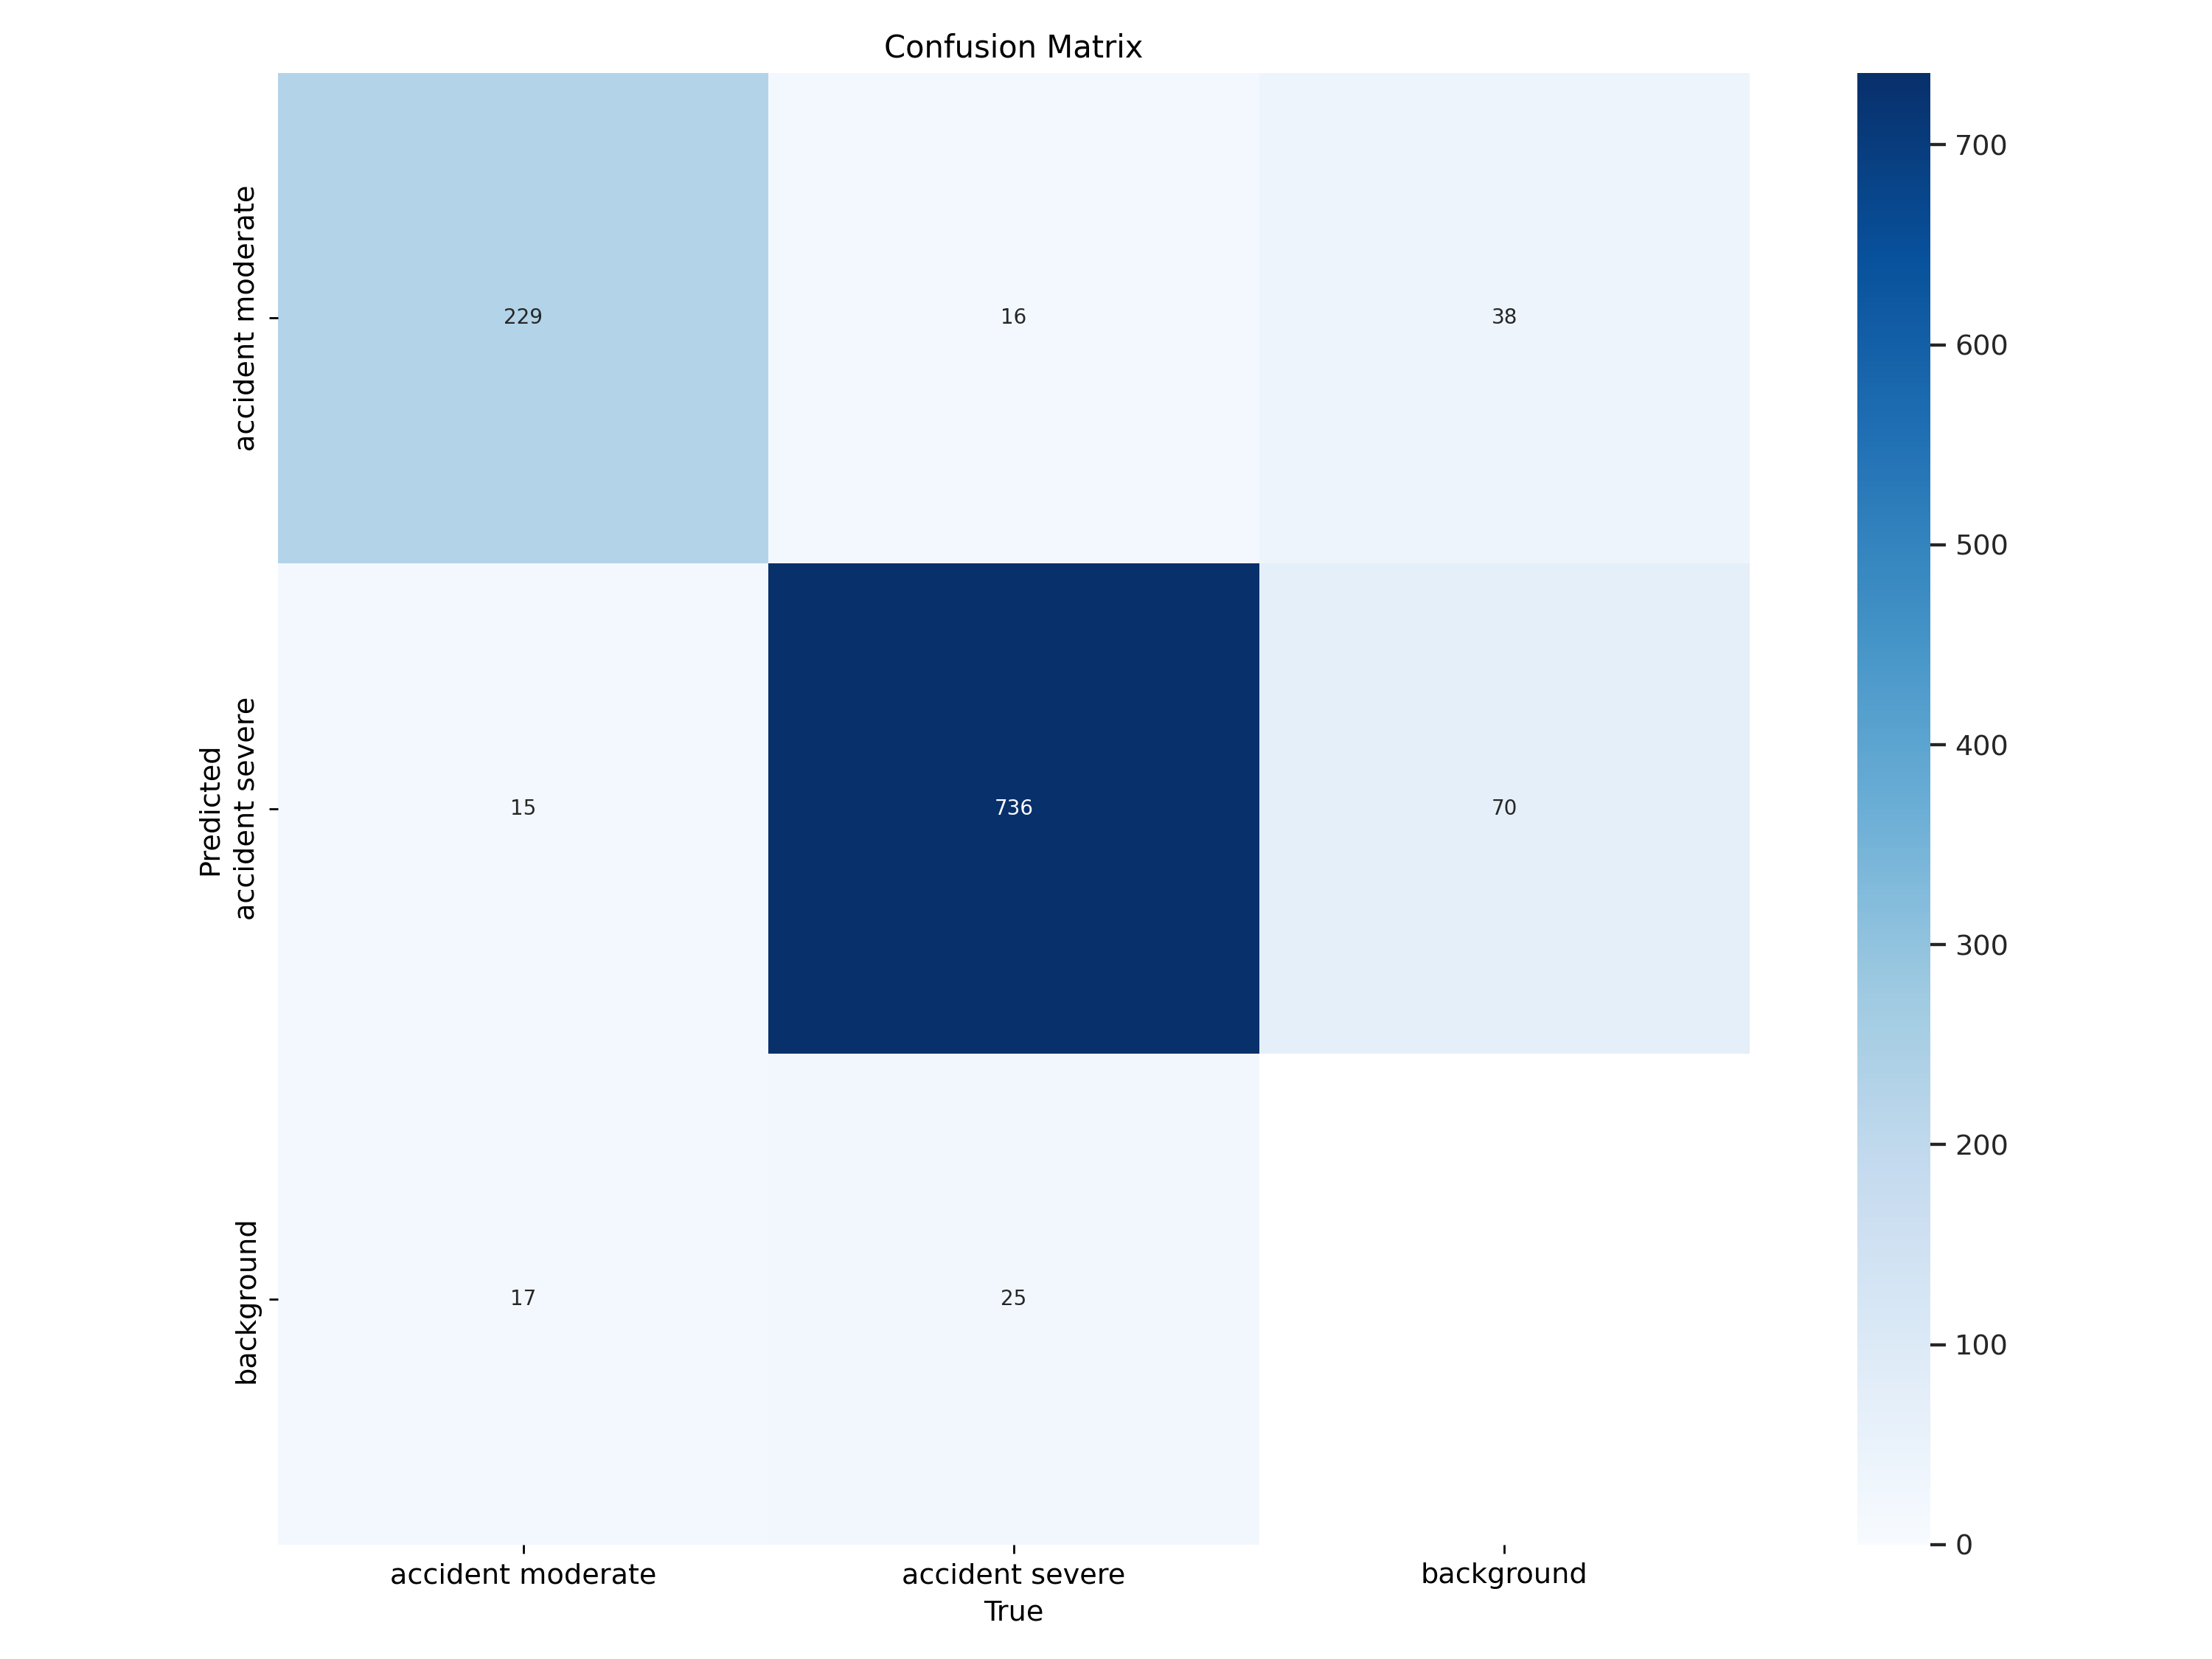

In [24]:
# Confusion-Matrix
Image(f'{HOME}/runs/detect/yolov8n_detections4/confusion_matrix.png', width=800)

Algumas métricas importantes:

- **metrics/mAP50(B):**
  representa a média de precisão (mAP) com um threshold de 0.50 durante a validação. Um aumento consistente no mAP50 indica que o modelo está melhorando na detecção de objetos nos dados de validação.
- **metrics/mAP50-95(B):** representa a média de precisão (mAP) em um
intervalo de thresholds de 0.50 a 0.95 durante a validação. Um aumento consistente no mAP50-95 indica que o modelo está melhorando em uma gama de diferentes thresholds de detecção


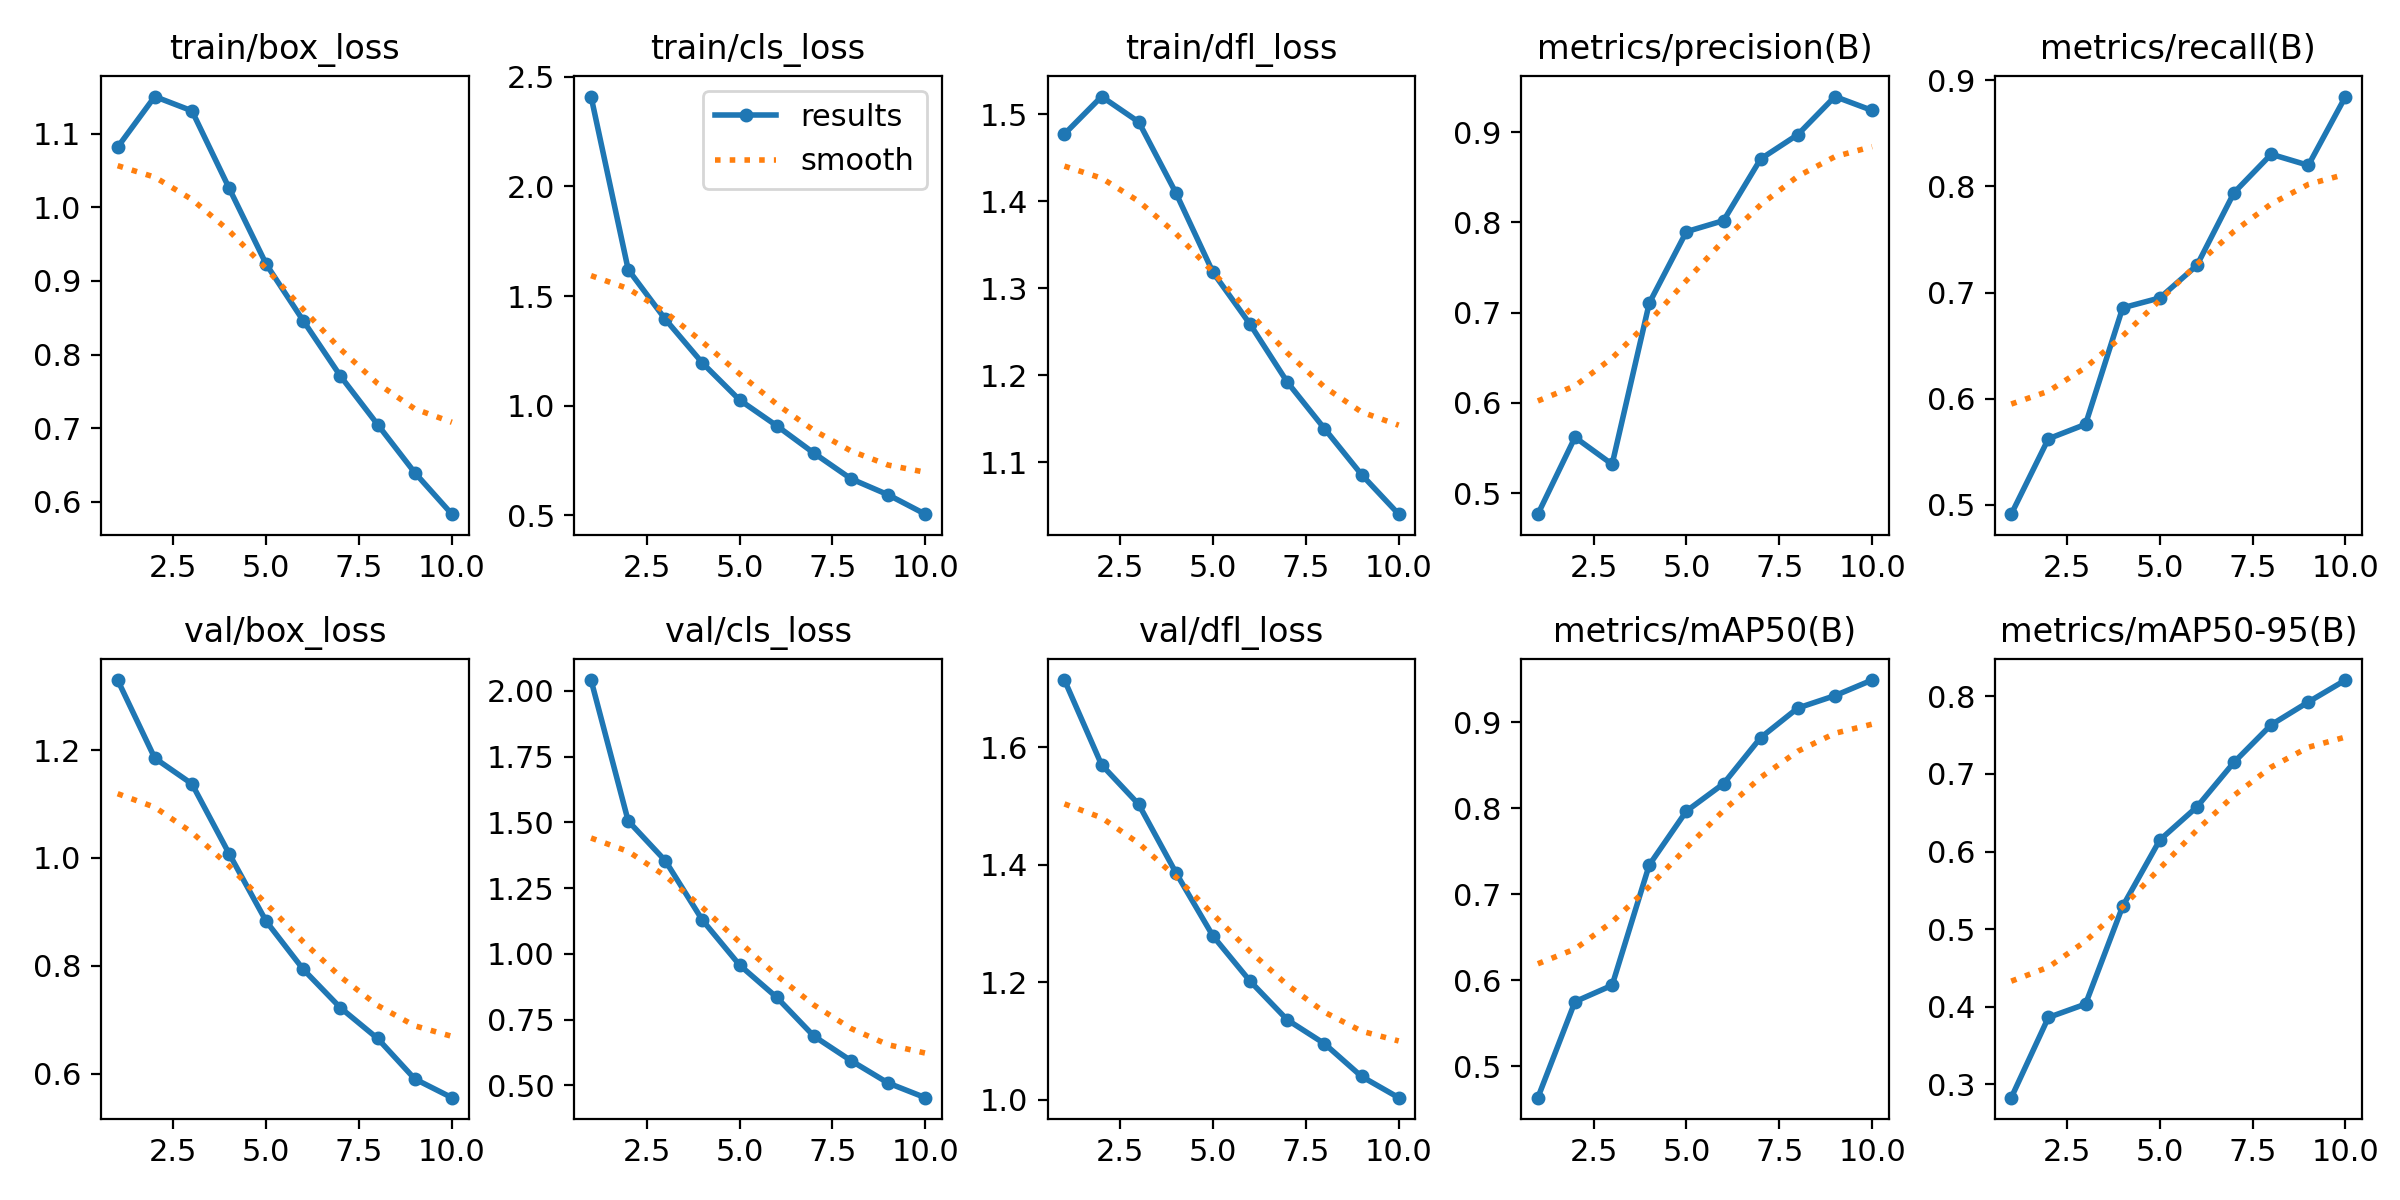

In [29]:
Image(f'{HOME}/runs/detect/yolov8n_detections4/results.png', width=800)

## Validação e Teste

In [27]:
# Iremos utilizar o modelo com o melhor desempenho durante o treinamento
model = YOLO('runs/detect/yolov8n_detections4/weights/best.pt')

In [28]:
results_val = model.val(
    data=f'{dataset.location}/data.yaml',
    imgsz=640,
    batch=8,
    conf=0.001,
    split='test'
)

Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Programa k/Car-Accident-Severity-1/test/labels... 333 images, 0 backgrounds, 0 corrupt: 100%|██████████| 333/333 [00:04<00:00, 73.64it/s]


val: New cache created: /content/drive/MyDrive/Programa k/Car-Accident-Severity-1/test/labels.cache


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:09<00:00,  4.23it/s]


                   all        333        350      0.886      0.896       0.94      0.809
     accident moderate         73         73      0.819      0.867      0.901      0.767
       accident severe        262        277      0.952      0.924      0.979       0.85
Speed: 0.5ms preprocess, 8.0ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/val
